# Task 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.special
import math
import scipy.constants as const
# import scipy.constants.physical_constants

In [ ]:
def V_total(R, R_e, D_e):
    return D_e * ((R_e / R) ** 12 - 2 * (R_e / R) ** 6)


def reduced_mass(m1, m2):
    return (m1 * m2) / (m1 + m2)

def get_dist_matrix(R_0, R_N, N):
    R_ar = np.array([])

    for i in range(N):
        R_i = R_0 + (i * (R_N - R_0)) / N 
        R_ar = np.append(R_ar, R_i)
    return R_ar


def populate_energy_matrix(N, R_N, R_0):
    T = np.zeros([N, N])
    for i in range(N):
        for j in range(N):
            if i == j:
                T[i, j] = (pi ** 2) * (1 / 3 * (2 * N ** 2 + 1) - (np.sin(pi * i / N)) ** (-2)) / (4 * mu * (R_N - R_0) ** 2)
            else:
                T[i, j] = (pi ** 2) * (- 1) ** (i - j) * ((np.sin(pi * (i - j) /  (2 * N))) ** (- 2) - (np.sin(pi * (i + j) /  (2 * N))) ** (- 2)) / (4 * mu * (R_N - R_0) ** 2)
    return T

# def populate_potential_matrix(N, R, R_e, D_e , mu):
#     V = np.zeros([N, N])
#     di = np.diag_indices(N) # diag indices of our array
#     V_int = V_total(R_ar, R_e, D_e)

#     di_ar = np.asarray(di)
#     R_to_diag = np.zeros([N, N])
#     grid = np.indices((N, N))
#     np.fill_diagonal(R_to_diag, V_int)
#     V = (grid[0] * (grid[0] + 1)) / (2 * mu * R_to_diag ** 2) + R_to_diag

#     t = np.zeros([dimension, dimension], dtype=bool)
#     t[di] = True

#     V[~t] = 0
#     return V
    



In [ ]:
# initial parameters

h_dash = 1
m_e = h_dash
pi = np.pi


physical_constants = const.physical_constants
hartree_kelvin_val = physical_constants['hartree-kelvin relationship'][0]

# all those variables in atomic units a.u

u = 1822.888
m_39K = 38.963707 * u
m_40K = 39.963999 * u
m_41K = 40.961825 * u

D_e = 0.0011141
R_e = 10.98

mu = reduced_mass(m_39K, m_40K)

R_0 = 5 # in a.u
R_N = 30
N = 1000
dimension = N

# collocations distances
R_ar = get_dist_matrix(R_0, R_N, N)

T = np.zeros([dimension, dimension])

di = np.diag_indices(N) # diag indices of our array
T = populate_energy_matrix(dimension, R_N, R_0)

V = np.zeros([dimension, dimension])
di = np.diag_indices(dimension) # diag indices of our array
V_int = V_total(R_ar, R_e, D_e)

di_ar = np.asarray(di)
R_to_diag = np.zeros([dimension, dimension])
grid = np.indices((dimension, dimension))
np.fill_diagonal(R_to_diag, V_int)
V = (grid[0] * (grid[0] + 1)) / (2 * mu * R_to_diag ** 2) + R_to_diag

t = np.zeros([dimension, dimension], dtype=bool)
t[di] = True

V[~t] = 0

# hamiltonian
H = T + V
H[0][0] = 0
# H
w, v = np.linalg.eig(H) # w eigenvalues and v eigenvectors

print(v.shape)
print(w.shape)

v_flipped = np.flip(v, axis=1)
v[14]

# plt.plot(R_ar, v_flipped[2])
# plt.xlim([498, 499])
# plt.show()


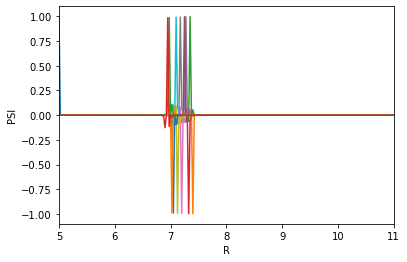

In [238]:

v_flipped = np.flip(v, axis=1)
# for i in v_flipped[14]:
#     print(i)

for i in range(14):
    plt.plot(R_ar, v_flipped[i])
    plt.ylabel("PSI")
    plt.xlabel("R")
    plt.xlim([5, 11])
    # plt.show()    

# plt.plot(R_ar, v_flipped[50])
# plt.ylabel("PSI")
# plt.xlabel("R")
# plt.xlim([5, 11])
# plt.show()